In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2

from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import DistanceMetric

test_image = "dataset_test/test.jpg"
images_dir = "dataset_test/dandelion"

models = {'VGG16': "vgg_model", 
          'InceptionV3': "inception_model", 
          'ResNet50': "resnet_model",
        #   'color': opencv_model1,
        #   'shapes':opencv_model2
          }


In [3]:
# Create a dataset of file paths
filenames = tf.data.Dataset.list_files(images_dir + "/*")

# Load the pre-trained ResNet50 model
def extract_features_image(model, image):
    image = load_img(image, target_size=(224, 224))
    image = img_to_array(image)
    # image = preprocess_input(image)
    if model == 'VGG16':
        model = VGG16(weights='imagenet', include_top=False)
        image = keras.applications.vgg16.preprocess_input(image)

    elif model == 'InceptionV3':
        model = InceptionV3(weights='imagenet', include_top=False)
        image = keras.applications.inception_v3.preprocess_input(image)

    elif model == 'ResNet50':
        image = keras.applications.resnet50.preprocess_input(image)
        model = ResNet50(weights='imagenet', include_top=False)

    features = model.predict(image.reshape((1, *image.shape)))
    return features, image

def extract_features_dataset(model, dataset_path):
    images = []
    features = []
    for image_path in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_path)
        image_features, image = extract_features_image(model, image_path)
        image_features = image_features.flatten()
        features.append(image_features)
        images.append(image)
    return features, images

features = extract_features_dataset('ResNet50', dataset_path=images_dir)


1/1 [==============================] - 1s 1s/step


KeyboardInterrupt: 

In [39]:
n = features[0]

In [48]:
dataset_features = features[0]
images = features[1][0]
m = np.array(n)

In [49]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=7, random_state=0).fit(m)


c:\Users\kateb\anaconda3\envs\newbase\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kateb\anaconda3\envs\newbase\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


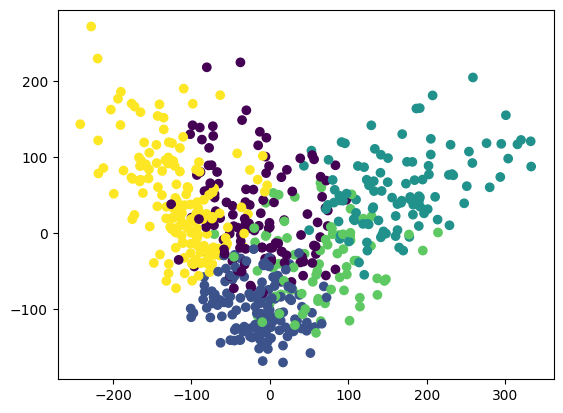

In [50]:

# Perform PCA on the features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(m)

# Plot the clusters using PCA
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.show()